In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('dataset1/Social_Network_Ads.csv')
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<Axes: xlabel='Purchased', ylabel='count'>

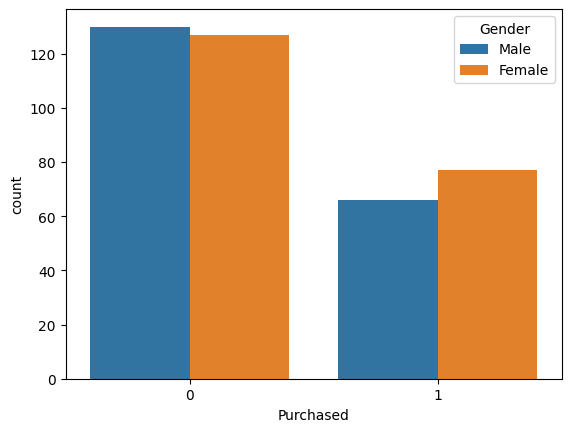

In [4]:
sns.countplot(x='Purchased', hue='Gender', data=df)

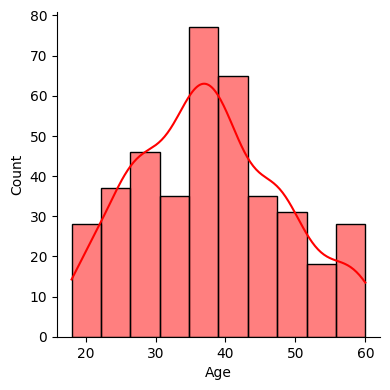

In [5]:
sns.displot(x='Age', color='red', data=df, height=4, kde=True)

In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender']) # gender = pd.get_dummies(df['
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


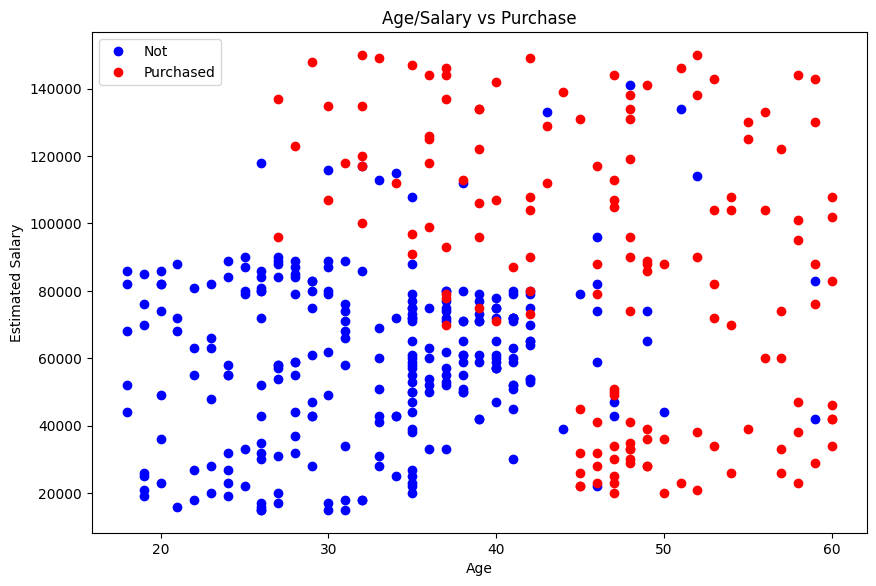

In [12]:
idx_zero = df[df['Purchased'] == 0].index
idx_one = df[df['Purchased'] == 1].index
plt.figure(figsize=(10,6.5))
plt.title("Age/Salary vs Purchase")
plt.plot(df['Age'][idx_zero], df['EstimatedSalary'][idx_zero], 'bo', label='Not')
plt.plot(df['Age'][idx_one], df['EstimatedSalary'][idx_one], 'ro', label='Purchased')
plt.ylabel('Estimated Salary')
plt.xlabel('Age')
plt.legend()
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
X = df.iloc[:,1:-1].values # df[['Gender', 'Age', 'EstimatedSalary']].values
y = df.iloc[:,-1].values # df['Purchased'].values


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
y_pred -y_test

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0, -1,  0,  0,  0,  1,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1], dtype=int64)

In [19]:
result = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
result

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
75,0,0
76,1,1
77,1,1
78,0,0


In [20]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,50,2,52
1,7,21,28
All,57,23,80


In [21]:
tn, fp, fn, tp = cf_matrix.ravel()
# Print the true positive, true negative, false positive, and false negative val
print("True Positive (TP): ", tp)
print("True Negative (TN): ", tn)
print("False Positive (FP): ", fp)
print("False Negative (FN): ", fn)


True Positive (TP):  21
True Negative (TN):  50
False Positive (FP):  2
False Negative (FN):  7


Text(0.5, 23.52222222222222, 'Predicted Y')

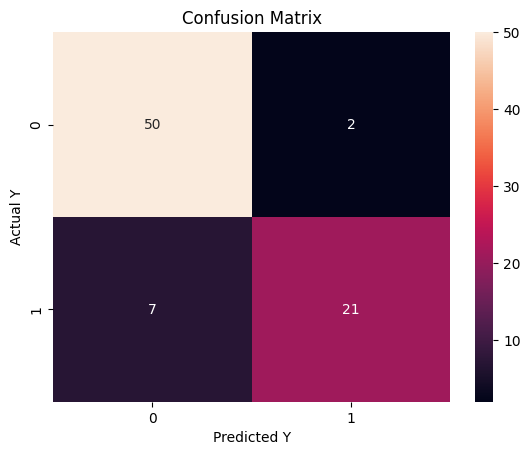

In [22]:
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Y')
plt.xlabel('Predicted Y')

In [23]:
Accuracy = (56+17) / 80 # Accuracy = (TP + TN) / (TP + FP + TN + FN)
Accuracy

0.9125

In [24]:
Error_Rate = (2+5) / 80 # Error = (FP + FN)/ (TP + FP + TN + FN)
Error_Rate

0.0875

In [25]:
Precision = 17 / (17+2) # Precision = TP / (TP + FP)
Precision

0.8947368421052632

In [26]:
Recall = 17 / (17 + 5) # Recall = TP / (TP + FN)
Recall

0.7727272727272727

In [27]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))

Accuracy: 0.887
Precision: 0.913
Recall: 0.750


In [28]:
from sklearn.metrics import classification_report
target_names = ['Not Purchased', 'Purchased']
print(classification_report(y_test, y_pred, target_names=target_names))

               precision    recall  f1-score   support

Not Purchased       0.88      0.96      0.92        52
    Purchased       0.91      0.75      0.82        28

     accuracy                           0.89        80
    macro avg       0.90      0.86      0.87        80
 weighted avg       0.89      0.89      0.88        80

